In [1]:
from utils import *
import seaborn as sns

sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
nlp = spacy.load("en_core_web_md")

# 1. Amostrando dados para análise

In [3]:
positives_df = pd.read_csv("../data/extreme_positive.csv").drop_duplicates("review_id")
negatives_df = pd.read_csv("../data/extreme_negative.csv").drop_duplicates("review_id")

In [4]:
positives_df["review_body"] = apply_text_processing_pipeline(positives_df["review_body"])
negatives_df["review_body"] = apply_text_processing_pipeline(negatives_df["review_body"])

In [5]:
raw_text_p = "\n".join(positives_df["review_body"].sample(frac=.5).to_list())
raw_text_n = "\n".join(negatives_df["review_body"].to_list())

# 2. Buscando quais palavras tem maior similaridade com "refrigerator" 

Word Embeddings! (GloVe imbutido no pacote "en_core_web_md") Avaliamos a similaridade através de distância de cossenos. O objetivo é encontrar sinônimos para o produto.

In [6]:
all_text = nlp(raw_text_p + raw_text_n)

In [7]:
threshold = 0.80
reference = nlp("refrigerator")

In [8]:
similar = set()
for tok in all_text:
    # s
    if tok.similarity(reference) > threshold:
        similar.add(tok.text)

In [9]:
similar

{'FREEZER',
 'FRIDGE',
 'FRIG',
 'Freezer',
 'Freezers',
 'Fridge',
 'Fridges',
 'Frig',
 'ICEMAKER',
 'Icemaker',
 'REFIGERATOR',
 'REFRIGERATOR',
 'REFRIGERATORS',
 'Refigerator',
 'Refrigerator',
 'Refrigerators',
 'crispers',
 'defrost',
 'defrosting',
 'freezer',
 'freezers',
 'fridge',
 'fridges',
 'frig',
 'frige',
 'icebox',
 'icemaker',
 'refridgerator',
 'refrig',
 'refrigerated',
 'refrigerator',
 'refrigerators'}

# 3. Extraindo relações de interesse

## 3.1 Transformando o texto em um documento do spaCy

In [10]:
pos_doc = nlp(raw_text_p)
neg_doc = nlp(raw_text_n)

## 3.2 Buscando por afirmações a respeito de um conjunto pre-definido de sujeitos

TODO: explicar a função do textacy

In [11]:
possible_subjects = ['it', 'refrigerator', 'fridge', 'freezer']

In [12]:
pos_infos = get_statements(pos_doc, possible_subjects)
neg_infos = get_statements(neg_doc, possible_subjects)

## 3.3 Amostrando resultados

In [13]:
from random import shuffle

In [14]:
shuffle(pos_infos), shuffle(neg_infos)

(None, None)

In [15]:
# Comentários positivos
pos_infos[:20]

[(refrigerator, is, huge, lightening is bright led inside),
 (It, is, the first time I have had it and am very happy),
 (it, is, less deep),
 (it, 's, just a refrigerator afterall),
 (it, was, an only one item),
 (it, is, very spacious),
 (It,
  's,
  quiet, shelves are adjustable and there is plenty of room for everything),
 (It, 's, just what I wanted-so much better than those little "cube" fridges),
 (refrigerator, is, the best fridge I have ever had),
 (fridge,
  is,
  almost 20 years old, and we really wanted to try all of the latest features),
 (Fridge, is, large enough for our large family of 7),
 (It,
  's,
  beautiful in the kitchen, works really well, and so roomy in the fridge and in the freezer),
 (it, is, fingerprint resistant),
 (Fridge, was, the last one standing),
 (fridge, is, quite compact),
 (it, is, just as convenient),
 (it, is, very quite),
 (fridge, is, just the right size and has sufficient space),
 (it, 's, do I g a great job),
 (refrigerator, is, perfect for o

In [16]:
# Comentários negativos 
neg_infos[:20]

[(It,
  's,
  loud and also it was installed with an uneven door so it squeaks loud every time you open the door),
 (fridge,
  was,
  around for 24 years and I have never had to replace a light bulb),
 (it, 's, not even funny. ),
 (it, 's, an issue with the compressor),
 (It,
  is,
  one of the few fridges I could find that would fit in my fridge slot in the kitchen),
 (it, was, the one for us),
 (it, 's, a few days over a year),
 (it, was, the compressor that costs almost $800 plus $200 to install),
 (It, is, loud and the noises sound like it is haunted),
 (it, 's, likely a quality issue and not just a random bad apple),
 (refrigerator, is, the ice maker and water dispenser),
 (it, is, n't as though I have a family of 6),
 (it, 's, a product-wide issue with a couple of simple internet searches),
 (fridge, is, well above the set temperature),
 (refrigerator, was, not up to par),
 (refrigerator, was, not cheap.),
 (it, 's, final noisy speed),
 (refrigerator, is, s LEMON, ice maker repea

## 3.4 Serializando informações obtidas

In [17]:
serialize_statements(pos_infos, "../extracted_infos/positive_aspects.json")
serialize_statements(neg_infos, "../extracted_infos/negative_aspects.json")

# 4 Criando WordClouds com as afirmações a respeitos dos sujeitos

## 4.1 Carregando palavras frequentes a ignorar

In [18]:
import json
with open("../data/ignore_words.json", "r") as f:
    ignore = json.load(f)

## 4.1 Reviews positivas

In [19]:
statements = [info[2].text for info in pos_infos]
statements[-20:]

['the perfect size',
 'a beauty',
 'worth the wait \n',
 'so large',
 'very quietthe only noise we hear',
 'super quiet, looks good and has so much room',
 'everything we expected',
 'very useful and easy to access',
 'very convenient easy to reach in and grab what I want',
 'spacious with multiple drawers for meat, fruits and vegetables',
 'an outstanding value',
 'user friendly',
 'quite roomy, very deep in fact, and fits everything we need plus more space available',
 'very stylish',
 'the perfect size for our shop to store cool water and Ginger Ale',
 "small but we have another fridge in the mudroom so that's not an issue for us.\n",
 'a month now and I can attest that this is an excellent Fridge',
 '.\n',
 'a side by side',
 'very roomy and spacious for loads of food']

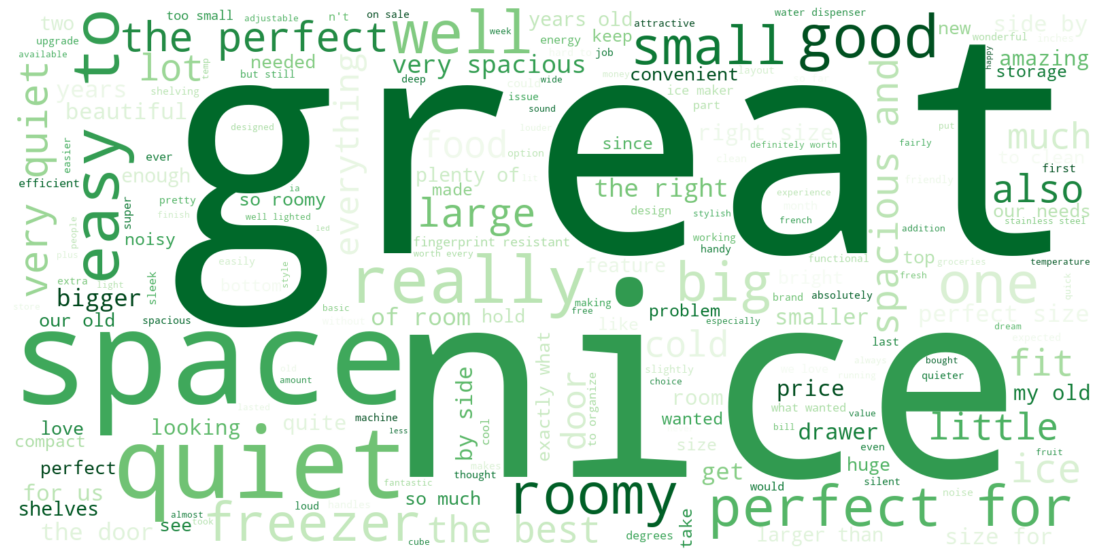

In [20]:
build_wordcloud("\n".join(statements), ignore, color_map="Greens")

## 4.2 Reviews negativas

In [21]:
statements = [info[2].text for info in neg_infos]
statements[-20:]

['over the 30 days',
 'ok, but bought this to replace a Kitchenaid which I liked more',
 'four years old',
 'too close to the wall',
 'annoyingly loud',
 'on the basement, afterall',
 '1 year',
 'fine, but if it needs to be flush add at least two inches',
 'a design flaw',
 'loud from day 1',
 'a known issue with NO FIX from GE',
 'AN EXPENSIVE FRIG AND SAMSUNG',
 'well fitting metal panel',
 '$250 for labor',
 'OVER 20 YEARS OLD ..\n',
 'about to stop running',
 'good idea to replace water line connecting water supply with the new one',
 'extremely loud',
 "like there's a woodpecker hitting metal inside",
 'like the entire fridge was a freezer']

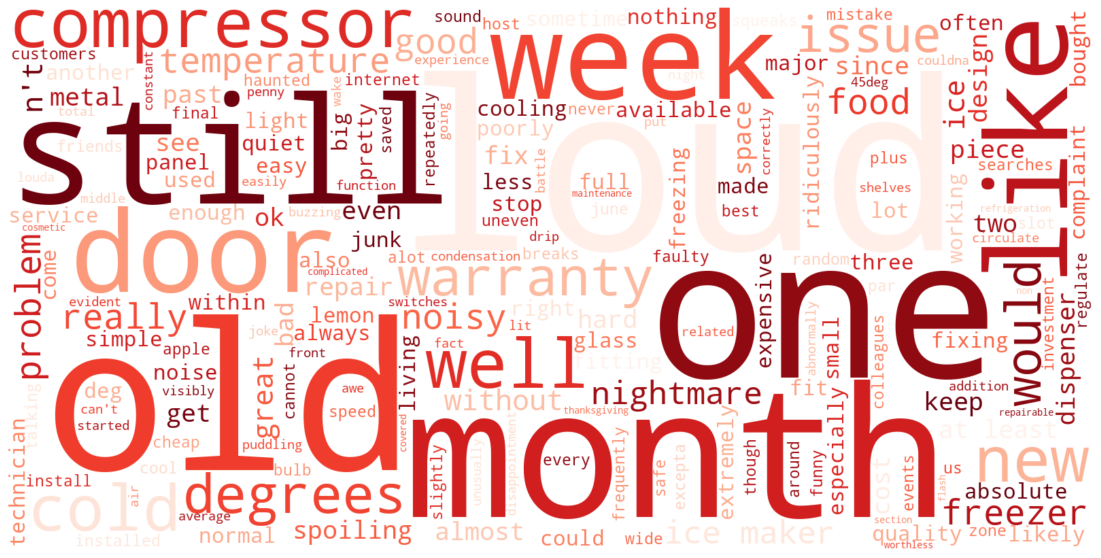

In [22]:
build_wordcloud("\n".join(statements), ignore, color_map="Reds")